In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## 1- What is the average delay and what percentage of flights depart later than scheduled?

In [4]:
flights= pd.read_csv('Flight Level Data.csv')
flights.sample(5)

,company_id,flight_number,scheduled_departure_date_local,scheduled_departure_station_code,scheduled_arrival_station_code,scheduled_departure_datetime_local,scheduled_arrival_datetime_local,actual_departure_datetime_local,actual_arrival_datetime_local,total_seats,fleet_type,carrier,scheduled_ground_time_minutes,actual_ground_time_minutes,minimum_turn_minutes
2803,OO,4739,2025-08-11,ORD,GRB,2025-08-11T15:35:00Z,2025-08-11T16:48:00Z,2025-08-11T15:33:00Z,2025-08-11T16:35:00Z,50,CRJ-200,Express,79,96,29
1393,UA,1793,2025-08-02,ORD,MSP,2025-08-02T08:50:00Z,2025-08-02T10:31:00Z,2025-08-02T08:54:00Z,2025-08-02T10:44:00Z,179,B737-900,Mainline,65,61,56
7957,UA,721,2025-08-08,ORD,BOS,2025-08-08T09:15:00Z,2025-08-08T12:50:00Z,2025-08-08T09:11:00Z,2025-08-08T12:51:00Z,179,B737-MAX9,Mainline,80,86,56
3757,OO,4809,2025-08-14,ORD,ICT,2025-08-14T09:03:00Z,2025-08-14T11:21:00Z,2025-08-14T09:00:00Z,2025-08-14T11:11:00Z,76,ERJ-175,Express,72,65,34
5430,OO,5469,2025-08-04,ORD,SDF,2025-08-04T07:25:00Z,2025-08-04T09:57:00Z,2025-08-04T07:24:00Z,2025-08-04T10:04:00Z,50,CRJ-550,Express,755,726,29


### Description and basic data insights.

In [8]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8099 entries, 0 to 8098
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   company_id                          8099 non-null   object
 1   flight_number                       8099 non-null   int64 
 2   scheduled_departure_date_local      8099 non-null   object
 3   scheduled_departure_station_code    8099 non-null   object
 4   scheduled_arrival_station_code      8099 non-null   object
 5   scheduled_departure_datetime_local  8099 non-null   object
 6   scheduled_arrival_datetime_local    8099 non-null   object
 7   actual_departure_datetime_local     8099 non-null   object
 8   actual_arrival_datetime_local       8099 non-null   object
 9   total_seats                         8099 non-null   int64 
 10  fleet_type                          8099 non-null   object
 11  carrier                             8099 non-null   obje

In [9]:
flights.describe()

,flight_number,total_seats,scheduled_ground_time_minutes,actual_ground_time_minutes,minimum_turn_minutes
count,8099.000000,8099.000000,8099.000000,8099.000000,8099.000000
mean,3020.995061,122.984072,183.787258,189.989999,48.039017
std,1812.647939,65.193567,565.910783,559.699915,24.017513
min,3.000000,50.000000,-980.000000,1.000000,29.000000
25%,1492.000000,50.000000,59.000000,60.000000,29.000000
50%,2440.000000,126.000000,74.000000,81.000000,43.000000
75%,4766.000000,179.000000,110.000000,125.000000,56.000000
max,6004.000000,364.000000,33327.000000,33327.000000,155.000000


### Step 1 - Changing the datatype to date_time in date/time columns

In [10]:
flights['Schedule_departure_time'] = pd.to_datetime(
    flights['scheduled_departure_datetime_local'])
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8099 entries, 0 to 8098
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype              
---  ------                              --------------  -----              
 0   company_id                          8099 non-null   object             
 1   flight_number                       8099 non-null   int64              
 2   scheduled_departure_date_local      8099 non-null   object             
 3   scheduled_departure_station_code    8099 non-null   object             
 4   scheduled_arrival_station_code      8099 non-null   object             
 5   scheduled_departure_datetime_local  8099 non-null   object             
 6   scheduled_arrival_datetime_local    8099 non-null   object             
 7   actual_departure_datetime_local     8099 non-null   object             
 8   actual_arrival_datetime_local       8099 non-null   object             
 9   total_seats                         8099 

In [11]:


flights['Actual_arrival_time'] = pd.to_datetime(
    flights['actual_arrival_datetime_local'])
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8099 entries, 0 to 8098
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype              
---  ------                              --------------  -----              
 0   company_id                          8099 non-null   object             
 1   flight_number                       8099 non-null   int64              
 2   scheduled_departure_date_local      8099 non-null   object             
 3   scheduled_departure_station_code    8099 non-null   object             
 4   scheduled_arrival_station_code      8099 non-null   object             
 5   scheduled_departure_datetime_local  8099 non-null   object             
 6   scheduled_arrival_datetime_local    8099 non-null   object             
 7   actual_departure_datetime_local     8099 non-null   object             
 8   actual_arrival_datetime_local       8099 non-null   object             
 9   total_seats                         8099 

## Step2 - Removing uncessary columns from the dataset

In [12]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8099 entries, 0 to 8098
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype              
---  ------                              --------------  -----              
 0   company_id                          8099 non-null   object             
 1   flight_number                       8099 non-null   int64              
 2   scheduled_departure_date_local      8099 non-null   object             
 3   scheduled_departure_station_code    8099 non-null   object             
 4   scheduled_arrival_station_code      8099 non-null   object             
 5   scheduled_departure_datetime_local  8099 non-null   object             
 6   scheduled_arrival_datetime_local    8099 non-null   object             
 7   actual_departure_datetime_local     8099 non-null   object             
 8   actual_arrival_datetime_local       8099 non-null   object             
 9   total_seats                         8099 

In [13]:
flights.iloc[:,15:17]

,Schedule_departure_time,Actual_arrival_time
0,2025-08-04 17:57:00+00:00,2025-08-04 20:52:00+00:00
1,2025-08-03 18:05:00+00:00,2025-08-04 08:06:00+00:00
2,2025-08-10 18:20:00+00:00,2025-08-10 23:26:00+00:00
3,2025-08-06 18:20:00+00:00,2025-08-06 22:42:00+00:00
4,2025-08-05 18:20:00+00:00,2025-08-05 21:49:00+00:00
...,...,...
8094,2025-08-15 07:45:00+00:00,2025-08-15 09:03:00+00:00
8095,2025-08-10 12:14:00+00:00,2025-08-10 13:57:00+00:00
8096,2025-08-15 16:50:00+00:00,2025-08-15 19:16:00+00:00
8097,2025-08-06 07:45:00+00:00,2025-08-06 09:01:00+00:00


In [14]:
import datetime as dt
flights["Delay_mins"] = (
    (flights["Actual_arrival_time"] - flights["Schedule_departure_time"])
    .dt.total_seconds() / 60
)
flights['Delay_mins'].sample(5)

5351    120.0
6708    122.0
5412     56.0
2761    385.0
4737    157.0
Name: Delay_mins, dtype: float64

## Calculation of Avg delay time

In [15]:
avg_delay = flights["Delay_mins"].mean()
print("Average Delay (min):", avg_delay)

Average Delay (min): 197.9344363501667


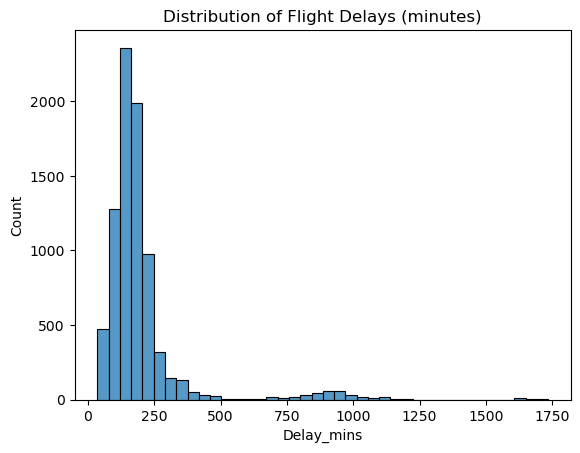

In [16]:
sns.histplot(flights["Delay_mins"].dropna(), bins=40)
plt.title("Distribution of Flight Delays (minutes)")
plt.show()

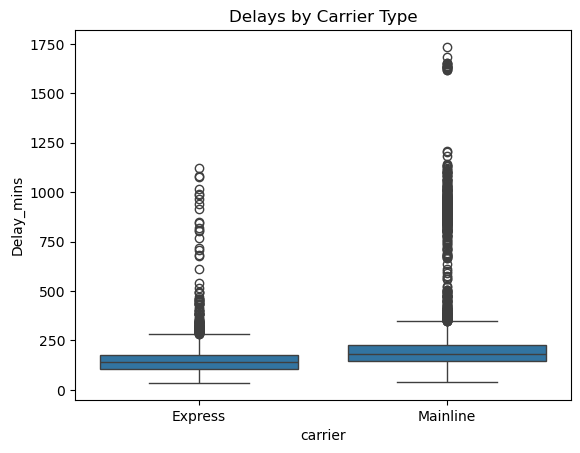

In [18]:
sns.boxplot(x="carrier", y="Delay_mins", data=flights)
plt.title("Delays by Carrier Type")
plt.show()

## Calculation for percentage of flights depart later than scheduled

In [13]:
late_departures = (flights['Delay_mins'] > 0).sum()
total_flights = len(flights)
percentage_late_departures = (late_departures / total_flights) * 100

print(f"Percentage of flights departed later than scheduled: {percentage_late_departures:.2f}%")

Percentage of flights departed later than scheduled: 100.00%


## 2- How many flights have scheduled ground time close to or below the minimum turn mins?

In [20]:
short_ground = (flights["scheduled_ground_time_minutes"] <= flights["minimum_turn_minutes"]).sum()
print("Flights with short/insufficient ground time:", short_ground)

Flights with short/insufficient ground time: 652


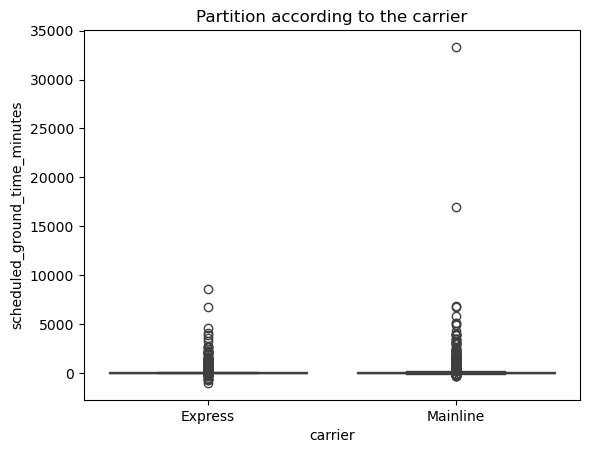

In [23]:
sns.boxplot(x="carrier", y="scheduled_ground_time_minutes", data=flights)
plt.title("Partition according to the carrier")
plt.show()

In [26]:
count_strict = flights[flights['scheduled_ground_time_minutes'] <= flights['minimum_turn_minutes']].shape[0]

count_close = flights[flights['scheduled_ground_time_minutes'] <= flights['minimum_turn_minutes'] + 10].shape[0]

print("Flights below or equal to min turn time:", count_strict)
print("Flights within 10 mins of min turn time:", count_close)

Flights below or equal to min turn time: 652
Flights within 10 mins of min turn time: 1183


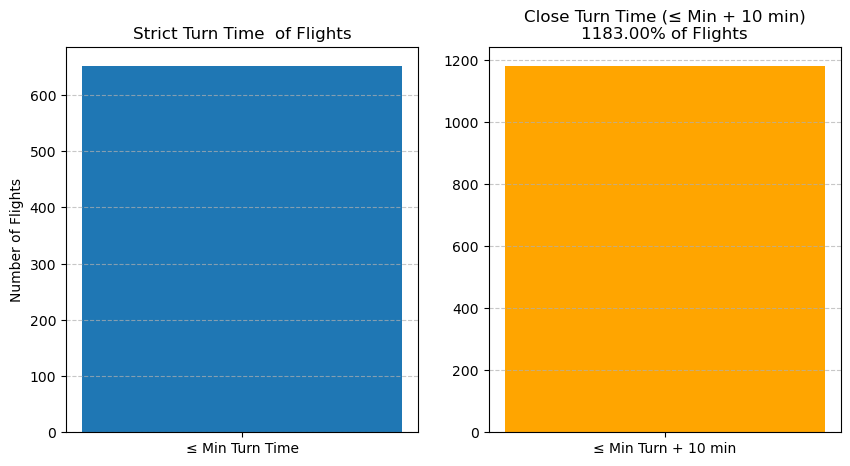

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].bar(['≤ Min Turn Time'], [count_strict])
axes[0].set_title(f'Strict Turn Time  of Flights')
axes[0].set_ylabel('Number of Flights')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

axes[1].bar(['≤ Min Turn + 10 min'], [count_close], color='orange')
axes[1].set_title(f'Close Turn Time (≤ Min + 10 min)\n{count_close:.2f}% of Flights')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

## 3- What is the average ratio of transfer bags vs. checked bags across flights?

In [24]:
bags=pd.read_csv('Bag+Level+Data.csv')
bags.sample(10)

,company_id,flight_number,scheduled_departure_date_local,scheduled_departure_station_code,scheduled_arrival_station_code,bag_tag_unique_number,bag_tag_issue_date,bag_type
112722,UA,1324,2025-08-05,ORD,SFO,BAGTAG_529834,2025-08-05,Hot Transfer
135590,UA,1742,2025-08-06,ORD,JAX,BAGTAG_451792,2025-08-06,Origin
651826,UA,2620,2025-08-14,ORD,EWR,BAGTAG_75868,2025-08-14,Hot Transfer
126280,UA,2189,2025-08-06,ORD,LGA,BAGTAG_366097,2025-08-06,Transfer
72430,AC,576,2025-08-04,ORD,DEN,BAGTAG_352779,2025-08-03,Transfer
41408,UA,758,2025-08-03,ORD,EWR,BAGTAG_178729,2025-08-02,Transfer
14018,UA,953,2025-08-01,ORD,MUC,BAGTAG_255350,2025-08-01,Transfer
162864,UA,1823,2025-08-08,ORD,IAH,BAGTAG_40639,2025-08-08,Origin
555017,UA,2226,2025-08-11,ORD,CLE,BAGTAG_136361,2025-08-10,Transfer
94585,UA,2039,2025-08-04,ORD,MCO,BAGTAG_608330,2025-08-04,Origin


In [36]:
bags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687245 entries, 0 to 687244
Data columns (total 8 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   company_id                        687245 non-null  object
 1   flight_number                     687245 non-null  int64 
 2   scheduled_departure_date_local    687245 non-null  object
 3   scheduled_departure_station_code  687245 non-null  object
 4   scheduled_arrival_station_code    687245 non-null  object
 5   bag_tag_unique_number             687245 non-null  object
 6   bag_tag_issue_date                687245 non-null  object
 7   bag_type                          687245 non-null  object
dtypes: int64(1), object(7)
memory usage: 41.9+ MB


In [55]:
bags['is_checked'] = bags['bag_tag_issue_date'] == bags['scheduled_departure_date_local']
Checked_bags= bags['is_checked'].sum()
Checked_bags

np.int64(620999)

In [49]:
Transfer_bags = bags['bag_type'].isin(['Transfer']).sum()
Transfer_bags

np.int64(347546)

### Firstly calculation of the ratios

In [51]:
bags['transfer_to_checked_ratio'] = Transfer_bags / Checked_bags
bags['transfer_to_checked_ratio'] 

0         0.559656
1         0.559656
2         0.559656
3         0.559656
4         0.559656
            ...   
687240    0.559656
687241    0.559656
687242    0.559656
687243    0.559656
687244    0.559656
Name: transfer_to_checked_ratio, Length: 687245, dtype: float64

## Calculations of the averages

In [53]:
average_ratio = bags['transfer_to_checked_ratio'].mean()
average_ratio

np.float64(0.5596562957428266)

In [54]:
print("Average ratio of transfer bags to checked bags across flights:", average_ratio)

Average ratio of transfer bags to checked bags across flights: 0.5596562957428266


## 4- How do passenger loads compare across flights, and do higher loads correlate with operational difficulty?

In [30]:
Loads= pd.read_csv("PNR+Flight+Level+Data.csv")
Loads.sample(5)

,company_id,flight_number,scheduled_departure_date_local,scheduled_departure_station_code,scheduled_arrival_station_code,record_locator,pnr_creation_date,total_pax,is_child,basic_economy_ind,is_stroller_user,lap_child_count
400755,UA,356,2025-08-07,ORD,ATL,PNR_114310,2025-07-08,1,N,1,N,0
7578,UA,2067,2025-08-15,ORD,BOS,PNR_496767,2025-03-27,1,N,0,N,0
131953,G7,4458,2025-08-06,ORD,LIT,PNR_104697,2025-05-12,1,N,0,N,0
206039,UA,1899,2025-08-04,ORD,YYC,PNR_39446,2025-06-19,1,N,0,N,0
170617,UA,2418,2025-08-13,ORD,PHL,PNR_38141,2025-07-29,1,N,0,N,0


In [31]:
Loads["company_id"].value_counts()

company_id
UA    531217
OO     89758
YX     33699
G7     33204
Name: count, dtype: int64

In [32]:
Loads["Total_passenger"] = Loads['total_pax'] + Loads['lap_child_count']

In [33]:
avg_load = Loads.groupby('company_id')['Total_passenger'].mean()
avg_load

company_id
G7    1.296802
OO    1.374451
UA    1.557220
YX    1.396481
Name: Total_passenger, dtype: float64

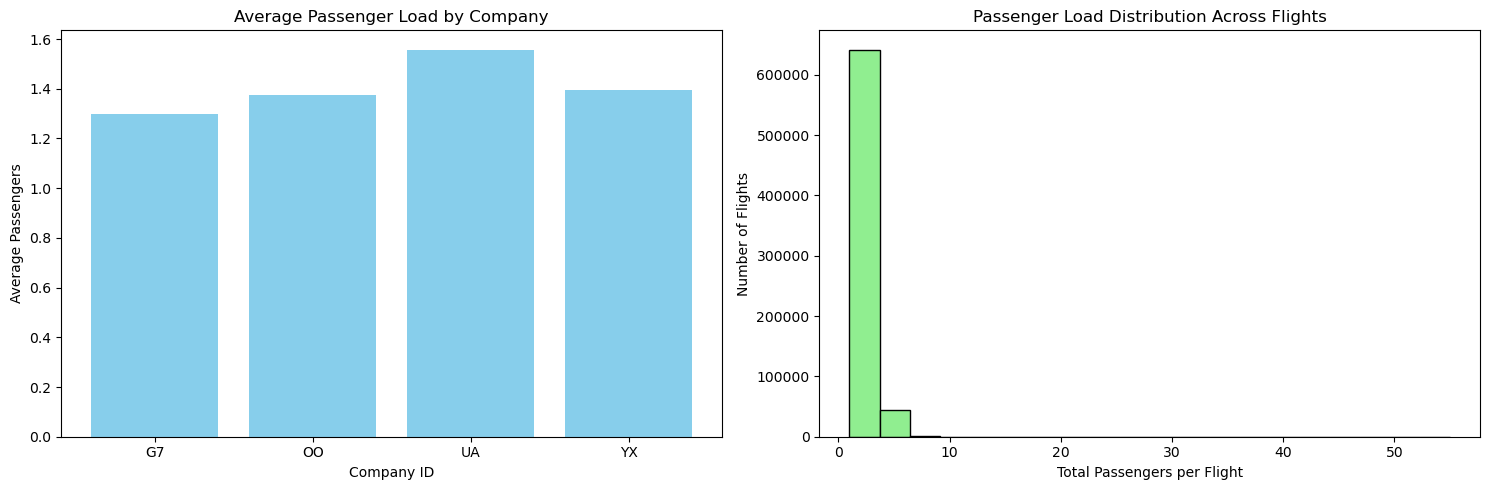

In [34]:


fig, axes = plt.subplots(1, 2, figsize=(15,5))  # 1 row, 2 columns

# Subplot 1: Company-wise average load
avg_load = Loads.groupby('company_id')['Total_passenger'].mean()
axes[0].bar(avg_load.index, avg_load.values, color='skyblue')
axes[0].set_title('Average Passenger Load by Company')
axes[0].set_xlabel('Company ID')
axes[0].set_ylabel('Average Passengers')

# Subplot 2: Flight-wise load distribution
axes[1].hist(Loads['Total_passenger'], bins=20, color='lightgreen', edgecolor='black')
axes[1].set_title('Passenger Load Distribution Across Flights')
axes[1].set_xlabel('Total Passengers per Flight')
axes[1].set_ylabel('Number of Flights')

plt.tight_layout()
plt.show()


## 5 - Are high special service requests flights also high-delay after controlling for load?

In [35]:
ssr=pd.read_csv('PNR Remark Level Data.csv')
ssr.sample(5)

,record_locator,pnr_creation_date,flight_number,special_service_request
51196,PNR_605668,2025-07-30,2465,Airport Wheelchair
49527,PNR_584683,2025-07-10,5975,Airport Wheelchair
1169,PNR_168341,2025-07-29,844,Airport Wheelchair
27757,PNR_325936,2025-07-28,1830,Airport Wheelchair
36392,PNR_430308,2025-06-24,602,Airport Wheelchair


### special service requests per flight

In [37]:
ssr_counts = ssr.groupby('flight_number')['special_service_request'].count().reset_index()
ssr_counts.rename(columns={'special_service_request':'ssr_count'}, inplace=True)
ssr_counts.sample()

,flight_number,ssr_count
3329,5251,23


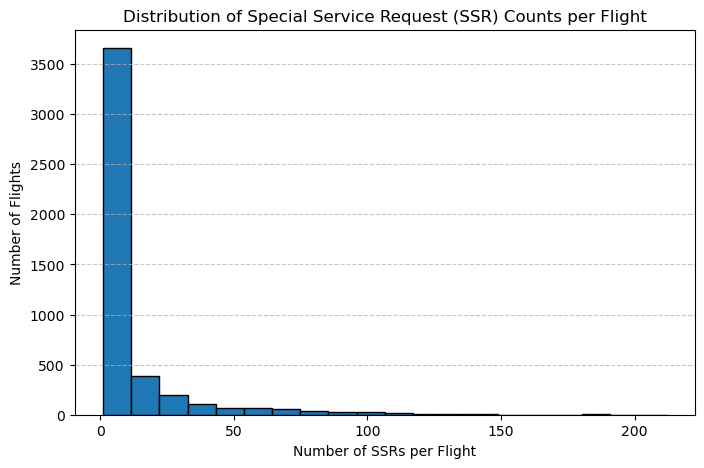

In [42]:
plt.figure(figsize=(8,5))
plt.hist(ssr_counts['ssr_count'], bins=20, edgecolor='black')
plt.title('Distribution of Special Service Request (SSR) Counts per Flight')
plt.xlabel('Number of SSRs per Flight')
plt.ylabel('Number of Flights')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [38]:
merged = flights.merge(ssr_counts, on='flight_number', how='left')
merged['ssr_count'] = merged['ssr_count'].fillna(0)  # in case some flights have no SSRs


In [39]:
merged['departure_delay'] = (
    (pd.to_datetime(merged['actual_departure_datetime_local']) -
     pd.to_datetime(merged['scheduled_departure_datetime_local']))
).dt.total_seconds() / 60  # in minutes

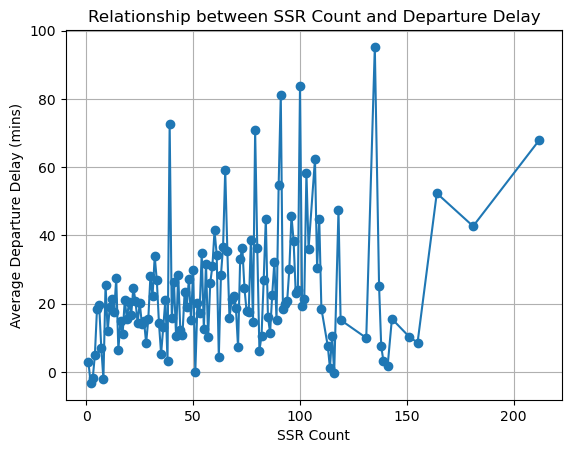

In [41]:
avg_delay_by_ssr = merged.groupby('ssr_count')['departure_delay'].mean().reset_index()
plt.plot(avg_delay_by_ssr['ssr_count'], avg_delay_by_ssr['departure_delay'], marker='o')
plt.xlabel('SSR Count')
plt.ylabel('Average Departure Delay (mins)')
plt.title('Relationship between SSR Count and Departure Delay')
plt.grid(True)
plt.show()